In [142]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import json
%matplotlib inline

In [143]:
path=Path()
parent_path=str(path.parent.absolute())[:-10]

In [144]:
removed_csv=parent_path+"/data/csvs/hmda_2017_ca_noname.csv"

In [145]:
numerics = ['loan_amount_000s', 'applicant_income_000s', 'population', 'minority_population',
            'hud_median_family_income', 'tract_to_msamd_income', 'number_of_owner_occupied_units',
            'number_of_1_to_4_family_units', 'application_date_indicator', 'rate_spread']
dtypes={}
for num in numerics:
        dtypes[num] = 'float64'

In [146]:
skimmed_df=pd.read_csv(removed_csv, low_memory=False, dtype=dtypes, na_values=' ')

In [147]:
js_road=parent_path+"/src/data_processing/code_map.json"

In [148]:
with open(js_road, 'r') as fh:
    code_map=json.load(fh)
    for i in code_map.keys():
        code_map[i]={int(m):n for m, n in code_map[i].items()}

In [149]:
skimmed_df.columns

Index(['as_of_year', 'respondent_id', 'agency_abbr', 'agency_code',
       'loan_type', 'property_type', 'loan_purpose', 'owner_occupancy',
       'loan_amount_000s', 'preapproval', 'action_taken', 'msamd',
       'state_abbr', 'state_code', 'county_code', 'census_tract_number',
       'applicant_ethnicity', 'co_applicant_ethnicity', 'applicant_race_1',
       'applicant_race_2', 'applicant_race_3', 'applicant_race_4',
       'applicant_race_5', 'co_applicant_race_1', 'co_applicant_race_2',
       'co_applicant_race_3', 'co_applicant_race_4', 'co_applicant_race_5',
       'applicant_sex', 'co_applicant_sex', 'applicant_income_000s',
       'purchaser_type', 'denial_reason_1', 'denial_reason_2',
       'denial_reason_3', 'rate_spread', 'hoepa_status', 'lien_status',
       'edit_status', 'sequence_number', 'population', 'minority_population',
       'hud_median_family_income', 'tract_to_msamd_income',
       'number_of_owner_occupied_units', 'number_of_1_to_4_family_units',
       'appl

In [150]:
code_map.keys()

dict_keys(['agency', 'loan_type', 'property_type', 'loan_purpose', 'owner_occupancy', 'preapproval', 'action_taken', 'ethnicity', 'race', 'sex', 'purchaser_type', 'denial_reason', 'hoepa_status', 'lien_status', 'edit_status', 'county'])

In [151]:
image_path=parent_path+'/result/eda/'
if not os.path.exists(image_path):
    os.makedirs(image_path)

# Ethnicity analysis

# a.) all applicant

In [152]:
skimmed_df['applicant_ethnicity']

0          2
1          2
2          3
3          2
4          2
          ..
1157690    4
1157691    1
1157692    3
1157693    3
1157694    4
Name: applicant_ethnicity, Length: 1157695, dtype: int64

In [153]:
EthnicityMap

{1: 'Hispanic or Latino',
 2: 'Not Hispanic or Latino',
 3: 'Unknown',
 4: 'Unknown',
 5: 'No co-applicant'}

In [154]:
EthnicityMap=code_map['ethnicity'].copy()
EthnicityMap[3]='Unknown'
EthnicityMap[4]='Unknown'

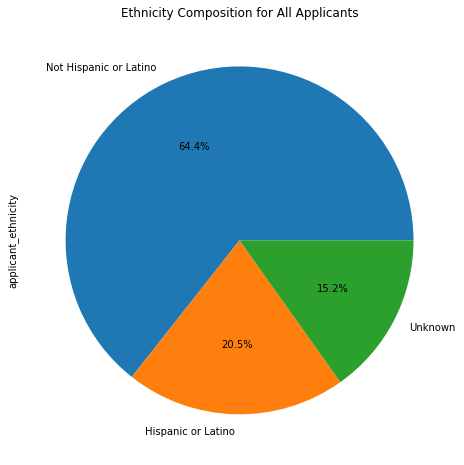

In [155]:
Ethnicity_total=skimmed_df['applicant_ethnicity'].replace(EthnicityMap).value_counts()
plt.figure(figsize=(8,8))
Ethnicity_total=Ethnicity_total.rename(index=EthnicityMap)
Ethnicity_total.plot.pie(legend=False, title='Ethnicity Composition for All Applicants',autopct='%1.1f%%')
plt.savefig(image_path+'Total_applicant_ethnicity.png', bbox_inches='tight')

In [156]:
skimmed_df['action_taken']

0          3
1          3
2          1
3          3
4          2
          ..
1157690    3
1157691    3
1157692    3
1157693    3
1157694    3
Name: action_taken, Length: 1157695, dtype: int64

In [157]:
actionM=code_map['action_taken']
actionM

{1: 'Loan originated',
 2: 'Application approved but not accepted',
 3: 'Application denied by financial institution',
 4: 'Application withdrawn by applicant',
 5: 'File closed for incompleteness',
 6: 'Loan purchased by the institution',
 7: 'Preapproval request denied by financial institution',
 8: 'Preapproval request approved but not accepted'}

In [158]:
Ethnicity_result

,applicant_ethnicity,action_taken
0,2,3
1,2,3
2,3,1
3,2,3
4,2,2
...,...,...
1157690,4,3
1157691,1,3
1157692,3,3
1157693,3,3


<Figure size 1440x1440 with 0 Axes>

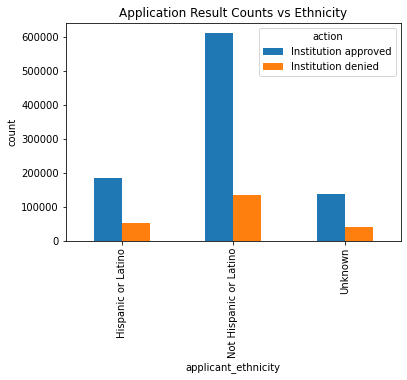

In [159]:
Ethnicity_result=skimmed_df[['applicant_ethnicity','action_taken']]
RecodeAction={1:"Institution approved",2:"Institution approved", 3:'Institution denied', 7:'Institution denied',8:'Institution approved'}
Ethnicity_result_b=pd.DataFrame()
Ethnicity_result_b['action']= Ethnicity_result['action_taken'].replace(RecodeAction)
Ethnicity_result_b['applicant_ethnicity']=Ethnicity_result['applicant_ethnicity'].replace(EthnicityMap)
Ethnicity_result_a1=Ethnicity_result_b.pivot_table(index='applicant_ethnicity', columns='action',aggfunc='size',fill_value=0)
plt.figure(figsize=(20,20))
Ethnicity_result_a1.plot.bar(title='Application Result Counts vs Ethnicity')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.savefig(image_path+'Application_result_count_ethnicity.png', bbox_inches='tight')

<Figure size 720x720 with 0 Axes>

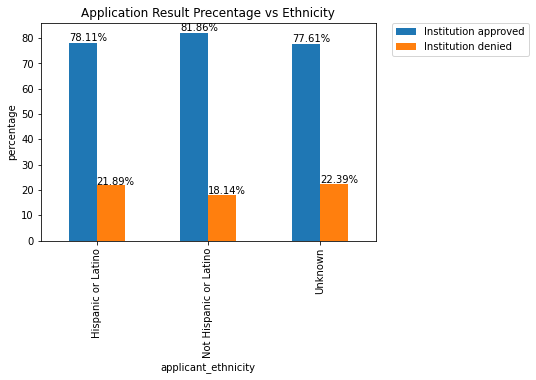

In [160]:
totalSA1=Ethnicity_result_a1.sum(axis=1)
Ethnicity_result_a2=Ethnicity_result_a1.T
temp=Ethnicity_result_a2/totalSA1.values
Ethnicity_result_a2=temp.T*100
plt.figure(figsize=(10,10))
SA2B=Ethnicity_result_a2.plot.bar(title='Application Result Precentage vs Ethnicity')
for p in SA2B.patches:
    SA2B.annotate(str("%.2f"%p.get_height())+'%', xy=(p.get_x(), p.get_height()*1.01))
plt.xticks(rotation=90)
plt.ylabel('percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(image_path+'Application_result_percentage_ethnicity.png', bbox_inches='tight')

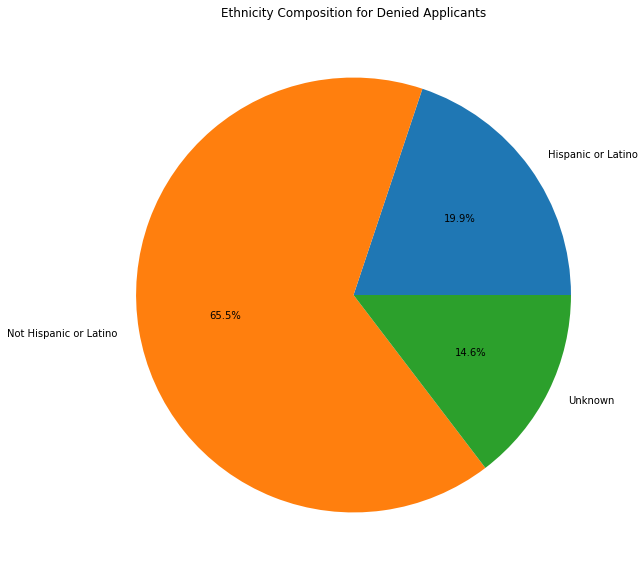

In [165]:
Ethnicity_result_approve=Ethnicity_result_a1['Institution approved'].replace(EthnicityMap).reindex(index=['Hispanic or Latino','Not Hispanic or Latino','Unknown'])
Ethnicity_result_approve=Ethnicity_result_approve.rename("")
plt.figure(figsize=(10,10))
Ethnicity_result_approve.plot.pie(legend=False,  title='Ethnicity Composition for Denied Applicants',autopct='%1.1f%%')
plt.savefig(image_path+'Approved_applicant_Ethnicity.png', bbox_inches='tight')

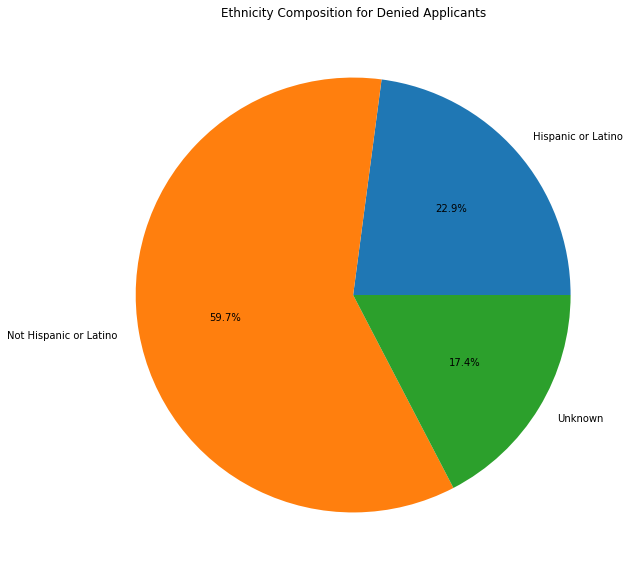

In [166]:
Ethnicity_result_approve=Ethnicity_result_a1['Institution denied'].replace(EthnicityMap).reindex(index=['Hispanic or Latino','Not Hispanic or Latino','Unknown'])
Ethnicity_result_approve=Ethnicity_result_approve.rename("")
plt.figure(figsize=(10,10))
Ethnicity_result_approve.plot.pie(legend=False,  title='Ethnicity Composition for Denied Applicants',autopct='%1.1f%%')
plt.savefig(image_path+'Denied_applicant_Ethnicity.png', bbox_inches='tight')

In [167]:
actionM=code_map['action_taken']
code_map['action_taken']

{1: 'Loan originated',
 2: 'Application approved but not accepted',
 3: 'Application denied by financial institution',
 4: 'Application withdrawn by applicant',
 5: 'File closed for incompleteness',
 6: 'Loan purchased by the institution',
 7: 'Preapproval request denied by financial institution',
 8: 'Preapproval request approved but not accepted'}

# b. co-applicant vs no co-applicant

In [168]:
skimmed_df['co_applicant_ethnicity'].value_counts()

5    594473
2    360391
1    112856
3     88190
4      1785
Name: co_applicant_ethnicity, dtype: int64

In [169]:
Coappli=skimmed_df[skimmed_df['co_applicant_ethnicity']!=5]
Nonco=skimmed_df[skimmed_df['co_applicant_ethnicity']==5]

In [170]:
Coappli=skimmed_df[skimmed_df['co_applicant_ethnicity']!=5]
Coappli

,as_of_year,respondent_id,agency_abbr,agency_code,loan_type,property_type,loan_purpose,owner_occupancy,loan_amount_000s,preapproval,...,lien_status,edit_status,sequence_number,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,application_date_indicator
0,2017,0000451965,CFPB,9,1,1,2,1,570.0,3,...,1,NaN,NaN,4824.0,37.230000,75200.0,57.419998,818.0,1626.0,NaN
2,2017,0000451965,CFPB,9,1,1,1,1,1079.0,3,...,1,NaN,NaN,3372.0,33.189999,97400.0,141.740005,592.0,1105.0,NaN
3,2017,13-6131491,HUD,7,1,1,3,1,417.0,3,...,1,NaN,NaN,8787.0,65.129997,97400.0,97.269997,1463.0,2164.0,NaN
7,2017,0000706051,OCC,1,1,2,1,1,264.0,3,...,1,NaN,NaN,2446.0,45.299999,63200.0,131.960007,570.0,700.0,NaN
10,2017,0000451965,CFPB,9,1,1,3,1,216.0,3,...,1,NaN,NaN,11626.0,82.010002,63200.0,102.099998,1783.0,2877.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157657,2017,0000028489,FDIC,3,1,3,3,3,1000.0,3,...,1,NaN,NaN,4263.0,59.180000,79300.0,58.060001,444.0,937.0,NaN
1157671,2017,0000451965,CFPB,9,1,3,2,3,750.0,3,...,1,NaN,NaN,4854.0,98.190002,64300.0,57.180000,324.0,1089.0,NaN
1157683,2017,0000852218,CFPB,9,1,3,1,3,800.0,3,...,1,NaN,NaN,5093.0,32.119999,64300.0,188.710007,1088.0,1266.0,NaN
1157686,2017,0000852218,CFPB,9,1,3,1,3,650.0,3,...,1,NaN,NaN,3638.0,66.709999,79300.0,42.419998,77.0,415.0,NaN


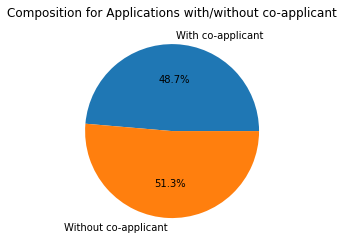

In [171]:
plt.figure()
plt.pie([len(Coappli),len(Nonco)],labels=['With co-applicant', 'Without co-applicant'],autopct='%1.1f%%')
plt.title('Composition for Applications with/without co-applicant')
plt.savefig(image_path+'Composition_for_Applications_with_or_without_co-applicant.png',bbox_inches='tight')

In [172]:
def pie_helper(value_counter,image_path,out_path,title):
        """
        a helper function for generating pie chart

        :param value_counter: value_counts dataframe
        :param image_path: out put image path
        :param out_path: out put image file name+.png
        :param title: picture title
        """
        df=value_counter.reindex(index=['Hispanic or Latino','Not Hispanic or Latino','Unknown'])
        df = df.rename("")
        df.plot.pie(legend=False, title=title,autopct='%1.1f%%')
        plt.savefig(image_path+out_path, bbox_inches='tight')
  
        return

In [173]:
def bar_helper(df,image_path,out_path,title,EthnicityMap):
        """
        a helper function for generating percentage bar chart

        :param df: original dataframe
        :param image_path: out put image path
        :param out_path: out put image file name+.png
        :param title: picture title
        :param EthnicityMap: gender code map
        """
        Ethnicity_result=df[['applicant_ethnicity','action_taken']]
        RecodeAction={1:"Institution approved",2:"Institution approved", 3:'Institution denied', 7:'Institution denied',8:'Institution approved'}
        Ethnicity_result_b=pd.DataFrame()
        Ethnicity_result_b['action']= Ethnicity_result['action_taken'].replace(RecodeAction)
        Ethnicity_result_b['applicant_ethnicity']=Ethnicity_result['applicant_ethnicity'].replace(EthnicityMap)
        Ethnicity_result_a1=Ethnicity_result_b.pivot_table(index='applicant_ethnicity', columns='action',aggfunc='size',fill_value=0)
        totalSA1=Ethnicity_result_a1.sum(axis=1)
        Ethnicity_result_a2=Ethnicity_result_a1.T
        temp=Ethnicity_result_a2/totalSA1.values
        Ethnicity_result_a2=temp.T*100
        plt.figure()
        SA2B=Ethnicity_result_a2.plot.bar(title=title)
        for p in SA2B.patches:
            SA2B.annotate(str("%.2f"%p.get_height())+'%', xy=(p.get_x(), p.get_height()*1.01))
        plt.xticks(rotation=360)
        plt.ylabel('percentage')
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.savefig(image_path+out_path, bbox_inches='tight')

        return


In [174]:
 def pivot_value_helper(df,EthnicityMap):
        """
        get pivot table with gender value counts

        :param df: original data frame
        :return: the pivot table with gender value counts
        """
        Ethnicity_result=df[['applicant_ethnicity','action_taken']]
        RecodeAction={1:"Institution approved",2:"Institution approved", 3:'Institution denied', 7:'Institution denied',8:'Institution approved'}
        Ethnicity_result_b=pd.DataFrame()
        Ethnicity_result_b['action']= Ethnicity_result['action_taken'].replace(RecodeAction)
        Ethnicity_result_b['applicant_ethnicity']=Ethnicity_result['applicant_ethnicity'].replace(EthnicityMap)
        Ethnicity_result_a1=Ethnicity_result_b.pivot_table(index='applicant_ethnicity', columns='action',aggfunc='size',fill_value=0)
        return Ethnicity_result_a1

# With No Co-applicant

In [175]:
Noncopv=pivot_value_helper(Nonco,EthnicityMap)
Coapplipv=pivot_value_helper(Coappli,EthnicityMap)

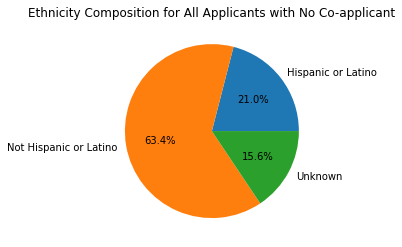

In [176]:
pie_helper(Nonco['applicant_ethnicity'].replace(EthnicityMap).value_counts(),image_path,
           'Ethnicity_composition_for_all_applicants_no_co-applicant.png','Ethnicity Composition for All Applicants with No Co-applicant')

<Figure size 432x288 with 0 Axes>

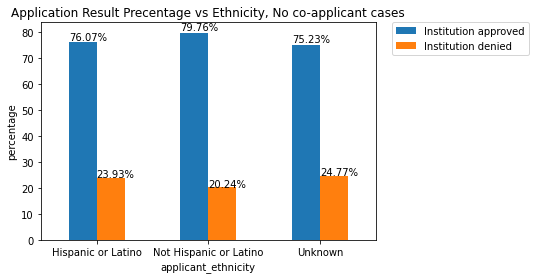

In [177]:
bar_helper(Nonco,image_path,
           'Application_result_percentage_vs_ethnicity_no_co-applicant.png',
           'Application Result Precentage vs Ethnicity, No co-applicant cases' , EthnicityMap)

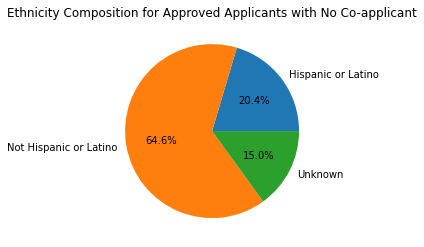

In [179]:
pie_helper(Noncopv['Institution approved'].reindex(index=['Hispanic or Latino','Not Hispanic or Latino','Unknown']),image_path,
           'Approved_applicants_ethnicity_no_co-applicant.png','Ethnicity Composition for Approved Applicants with No Co-applicant')

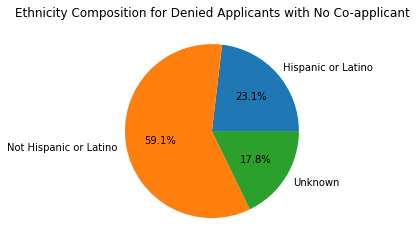

In [178]:
pie_helper(Noncopv['Institution denied'].reindex(index=['Hispanic or Latino','Not Hispanic or Latino','Unknown']),image_path,
           'Denied_applicants_ethnicity_no_co-applicant.png','Ethnicity Composition for Denied Applicants with No Co-applicant')

# With Co-applicant

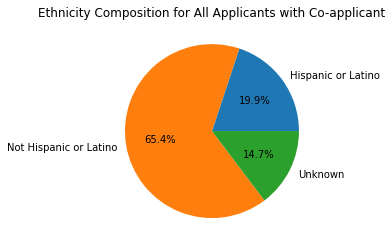

In [180]:
pie_helper(Coappli['applicant_ethnicity'].replace(EthnicityMap).value_counts(),image_path,
           'Ethnicity_composition_for_all_applicants_co-applicant.png','Ethnicity Composition for All Applicants with Co-applicant')

<Figure size 432x288 with 0 Axes>

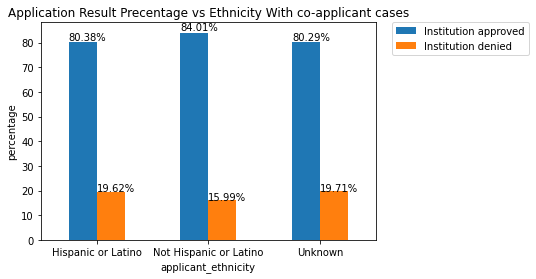

In [181]:
bar_helper(Coappli,image_path,
           'Application_result_percentage_vs_ethnicity_co-applicant.png',
           'Application Result Precentage vs Ethnicity With co-applicant cases' , EthnicityMap)

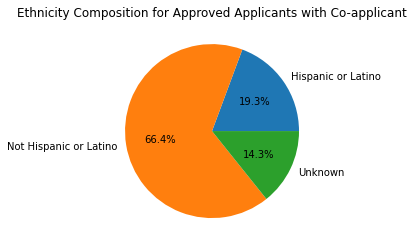

In [182]:
pie_helper(Coapplipv['Institution approved'].reindex(index=['Hispanic or Latino','Not Hispanic or Latino','Unknown']),image_path,
           'Approved_applicants_Ethnicity_co-applicant.png','Ethnicity Composition for Approved Applicants with Co-applicant')

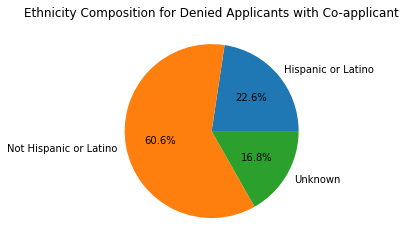

In [184]:
pie_helper(Coapplipv['Institution denied'].reindex(index=['Hispanic or Latino','Not Hispanic or Latino','Unknown']),image_path,
           'Denied_applicants_Ethnicity_co-applicant.png','Ethnicity Composition for Denied Applicants with Co-applicant')

# c.) Pair analysis

In [185]:
Cover=Coappli.copy()
Cover['Pair_Ethnicity']=Cover['applicant_ethnicity'].astype(str)+Cover['co_applicant_ethnicity'].astype(str)

In [186]:
Cover['Pair_Ethnicity'].value_counts()

22    339254
11     91778
33     76754
21     20060
12     17613
23      8496
32      2999
13      2562
31       984
44       846
24       581
42       525
43       378
34       204
14       154
41        34
Name: Pair_Ethnicity, dtype: int64

In [187]:
PairDict={'11':"Main:Hispanic or Latino,Co:Hispanic or Latino",'12':'Main:Hispanic or Latino,Co:Not Hispanic or Latino','13':'Main:Hispanic or Latino,Co:Unknown','14':'Main:Hispanic or Latino,Co:Unknown',
         '21':"Main:Not Hispanic or Latino,Co:Hispanic or Latino",'22':'Main:Not Hispanic or Latino,Co:Not Hispanic or Latino','23':'Main:Not Hispanic or Latino,Co:Unknown','24':'Main:Not Hispanic or Latino,Co:Unknown',
         '31':"Main:Unknown,Co:Hispanic or Latino",'32':'Main:Unknown,Co:Hispanic or Latino','33':'Main:Unknown,Co:Unknown','34':'Main:Unknown,Co:Unknown',
         '41':"Main:Unknown,Co:Hispanic or Latino",'42':'Main:Unknown,Co:Hispanic or Latino','43':'Main:Unknown,Co:Unknown','44':'Main:Unknown,Co:Unknown'}

In [188]:
'Hispanic or Latino','Not Hispanic or Latino','Unknown'

('Hispanic or Latino', 'Not Hispanic or Latino', 'Unknown')

<Figure size 432x288 with 0 Axes>

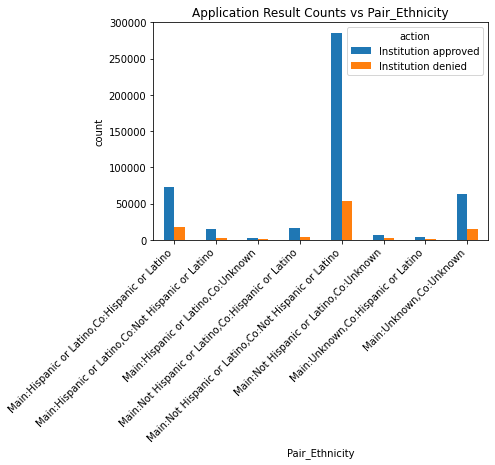

In [189]:
Ethnicity_result_pair=Cover[['Pair_Ethnicity','action_taken']]
RecodeAction={1:"Institution approved",2:"Institution approved", 3:'Institution denied', 7:'Institution denied',8:'Institution approved'}
Ethnicity_result_b_pair=pd.DataFrame()
Ethnicity_result_b_pair['action']= Ethnicity_result_pair['action_taken'].replace(RecodeAction)
Ethnicity_result_b_pair['Pair_Ethnicity']=Ethnicity_result_pair['Pair_Ethnicity'].replace(PairDict)
Ethnicity_result_a1_pair=Ethnicity_result_b_pair.pivot_table(index='Pair_Ethnicity', columns='action',aggfunc='size',fill_value=0)
plt.figure()
Ethnicity_result_a1_pair.plot.bar(title='Application Result Counts vs Pair_Ethnicity')
plt.ylabel('count')
plt.xticks(rotation=45,ha='right')
plt.savefig(image_path+'Application_result_count_Pair_Ethnicity.png', bbox_inches='tight')


<Figure size 432x288 with 0 Axes>

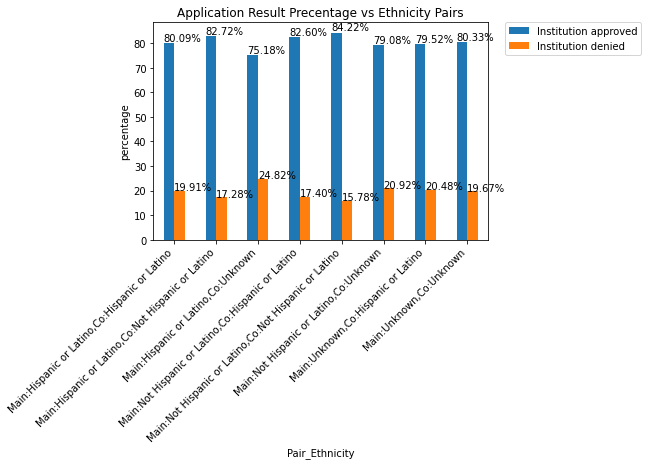

In [190]:
totalSA1_pair=Ethnicity_result_a1_pair.sum(axis=1)
Ethnicity_result_a2_pair=Ethnicity_result_a1_pair.T
temp=Ethnicity_result_a2_pair/totalSA1_pair.values
Ethnicity_result_a2_pair=temp.T*100
plt.figure()
SA2B_pair=Ethnicity_result_a2_pair.plot.bar(title='Application Result Precentage vs Ethnicity Pairs')
for p in SA2B_pair.patches:
    SA2B_pair.annotate(str("%.2f"%p.get_height())+'%', xy=(p.get_x(), p.get_height()*1.01))
plt.xticks(rotation=45,ha='right')
plt.ylabel('percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(image_path+'Application_result_percentage_Ethnicity_pair.png', bbox_inches='tight')